In [81]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.feature_selection import RFE
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score


In [82]:
# Load the dataset
df = pd.read_csv('undersampled_sepsis_data_wtarget.csv.zip')

In [83]:
# Get basic info about the dataset
print("Number of rows and columns:", df.shape)

Number of rows and columns: (38550, 25)


In [84]:
# Display the first few rows of the dataframe
print("First few rows of the dataset:")
(df.head())

First few rows of the dataset:


,Patient_ID,Hour,HR,O2Sat,Temp,MAP,Resp,BaseExcess,FiO2,pH,...,Glucose,Magnesium,Potassium,Hct,WBC,Age,Gender,HospAdmTime,ICU_Type,SepsisLabel
0,6286,27,81.0,97.0,37.39,80.67,15.0,-2.0,0.5000,7.44,...,113.000000,1.8,4.000000,27.000,9.4000,71.15,1,-4.34,2.0,0
1,2457,34,90.0,100.0,36.60,87.00,20.0,NaN,NaN,NaN,...,72.411765,2.1,4.023529,NaN,NaN,51.83,0,-7.37,1.0,0
2,8715,8,85.0,99.0,38.00,62.67,25.0,0.0,0.4125,7.40,...,110.333333,2.3,4.350000,31.300,16.6000,45.91,1,-2.87,2.0,0
3,6588,15,73.0,98.0,37.44,89.00,15.0,0.0,0.5000,7.38,...,160.000000,2.1,4.300000,38.400,11.6000,69.68,1,-12.36,0.0,0
4,102417,17,98.0,94.0,37.18,86.00,21.0,NaN,NaN,NaN,...,103.200000,1.6,4.050000,36.075,16.6875,50.00,0,-391.98,2.0,0


In [85]:
#Display the columns in the dataset
print("\nColumns in the dataset:")
(df.columns)


Columns in the dataset:


Index(['Patient_ID', 'Hour', 'HR', 'O2Sat', 'Temp', 'MAP', 'Resp',
       'BaseExcess', 'FiO2', 'pH', 'PaCO2', 'Calcium', 'Creatinine',
       'Platelets', 'BUN', 'Glucose', 'Magnesium', 'Potassium', 'Hct', 'WBC',
       'Age', 'Gender', 'HospAdmTime', 'ICU_Type', 'SepsisLabel'],
      dtype='object')

In [86]:
# Summary statistics for numerical features
print("Summary Statistics:\n", df.describe())

Summary Statistics:
           Patient_ID          Hour            HR         O2Sat          Temp  \
count   38550.000000  38550.000000  38550.000000  38543.000000  38256.000000   
mean    53904.987782     39.971958     87.564943     97.084727     36.976486   
std     49911.286156     48.853733     18.461200      3.090812      0.822207   
min         1.000000      0.000000     21.500000     31.000000     30.830000   
25%      9129.000000     10.000000     74.000000     96.000000     36.480000   
50%     18185.000000     24.000000     86.000000     98.000000     36.920000   
75%    108661.500000     46.000000    100.000000     99.500000     37.500000   
max    119998.000000    335.000000    200.000000    100.000000     40.980000   

                MAP          Resp    BaseExcess          FiO2            pH  \
count  38550.000000  38500.000000  16446.000000  22906.000000  23195.000000   
mean      81.458818     19.425567     -0.307801      0.528221      7.385747   
std       16.177190  

In [87]:
# Check for missing values in the dataframe using isna() or isnull()
missing_values = df.isna()

# Count the number of missing values in each column
missing_values_count = missing_values.sum()

# Print columns with missing values and their respective counts
print("Columns with missing values and their counts:")
print(missing_values_count[missing_values_count > 0])


Columns with missing values and their counts:
O2Sat             7
Temp            294
Resp             50
BaseExcess    22104
FiO2          15644
pH            15355
PaCO2         15957
Calcium        6530
Creatinine     5044
Platelets      5563
BUN            4684
Glucose        2978
Magnesium      6267
Potassium      3631
Hct            4348
WBC            5293
dtype: int64


In [88]:
# Define the columns with missing values
columns_with_missing = [
    'O2Sat', 'Temp', 'Resp', 'BaseExcess', 'FiO2', 'pH', 'PaCO2',
    'Calcium', 'Creatinine', 'Platelets', 'BUN', 'Glucose', 'Magnesium',
    'Potassium', 'Hct', 'WBC'
]

# Create a SimpleImputer object with strategy='median'
imputer = SimpleImputer(strategy='median')

# Fill missing values with median for selected columns
df[columns_with_missing] = imputer.fit_transform(df[columns_with_missing])

# Verify that missing values have been filled
print("Number of missing values after imputation:")
print(df.isna().sum())

Number of missing values after imputation:
Patient_ID     0
Hour           0
HR             0
O2Sat          0
Temp           0
MAP            0
Resp           0
BaseExcess     0
FiO2           0
pH             0
PaCO2          0
Calcium        0
Creatinine     0
Platelets      0
BUN            0
Glucose        0
Magnesium      0
Potassium      0
Hct            0
WBC            0
Age            0
Gender         0
HospAdmTime    0
ICU_Type       0
SepsisLabel    0
dtype: int64


In [89]:
# Checking for Class Imbalance
import pandas as pd
class_counts = df['SepsisLabel'].value_counts()
print("Class Distribution:")
print(class_counts)

Class Distribution:
SepsisLabel
0    19275
1    19275
Name: count, dtype: int64


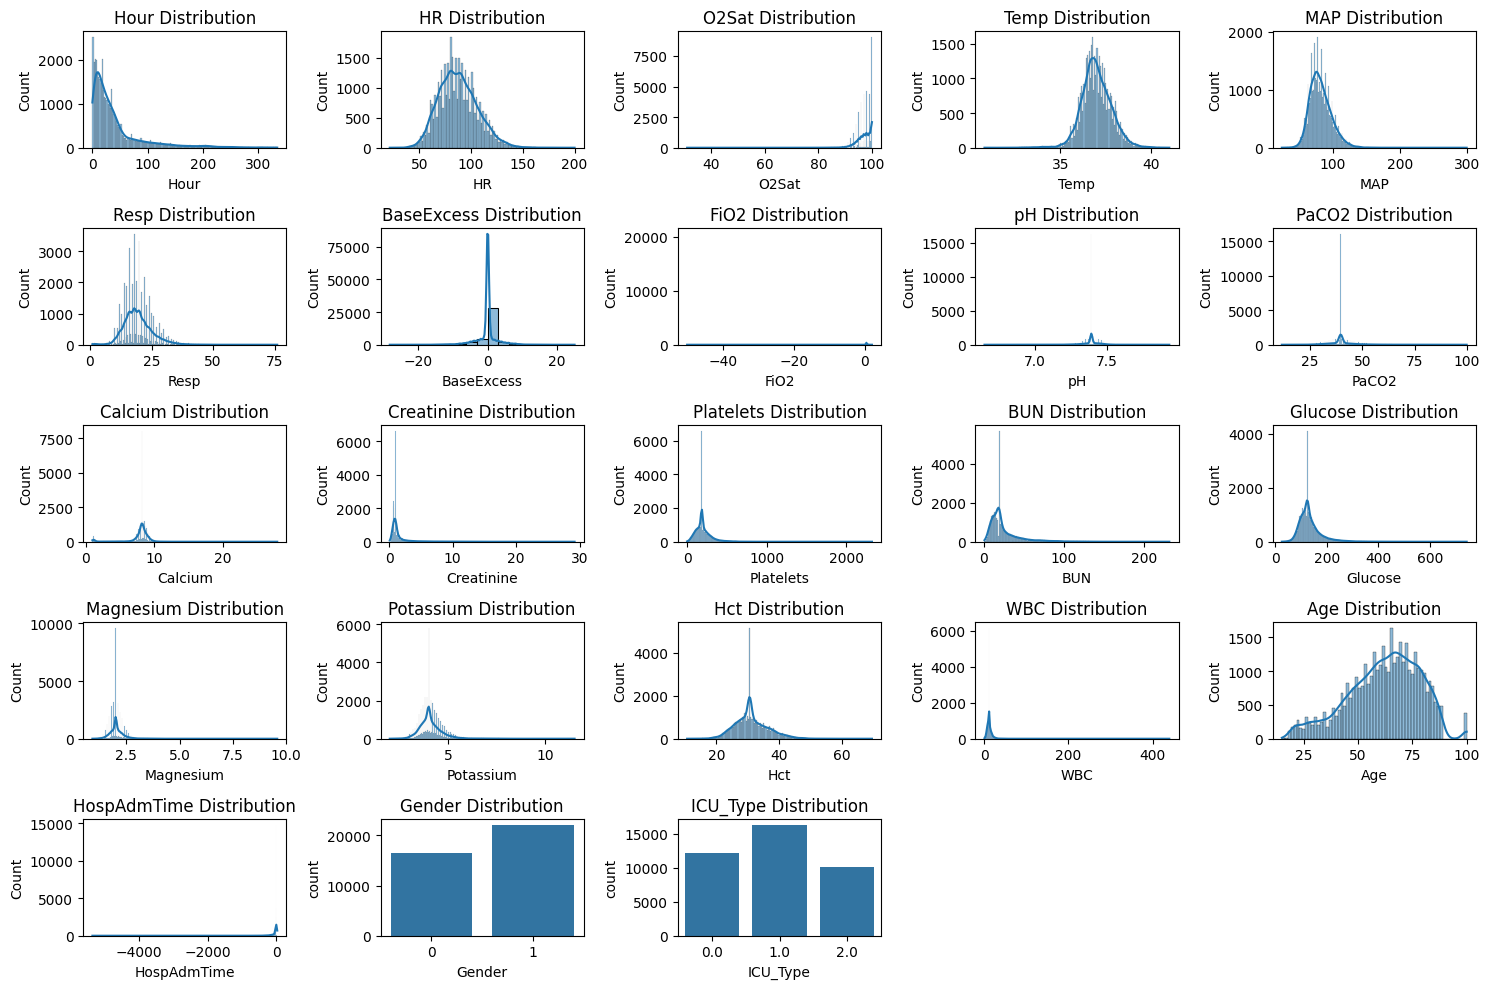

In [90]:
# Visual Distribution of features
import matplotlib.pyplot as plt
import seaborn as sns

# Select numerical features
numerical_features = ['Hour', 'HR', 'O2Sat', 'Temp', 'MAP', 'Resp',
                      'BaseExcess', 'FiO2', 'pH', 'PaCO2', 'Calcium', 'Creatinine',
                      'Platelets', 'BUN', 'Glucose', 'Magnesium', 'Potassium', 'Hct', 'WBC',
                      'Age', 'HospAdmTime']

# Select categorical features
categorical_features = ['Gender', 'ICU_Type']

# Set figure size
plt.figure(figsize=(15, 10))

# Plot histograms for numerical features
for i, feature in enumerate(numerical_features, 1):
    plt.subplot(5, 5, i)
    sns.histplot(df[feature], kde=True)
    plt.title(f'{feature} Distribution')

# Plot count plots for categorical features
for i, feature in enumerate(categorical_features, 1):
    plt.subplot(5, 5, i + len(numerical_features))
    sns.countplot(x=feature, data=df)
    plt.title(f'{feature} Distribution')

# Adjust layout
plt.tight_layout()
plt.show()


Correlation Matrix:
             Patient_ID      Hour        HR     O2Sat      Temp       MAP  \
Patient_ID     1.000000 -0.019637 -0.021403 -0.027553 -0.078564  0.195946   
Hour          -0.019637  1.000000  0.069983 -0.041513  0.099849  0.022293   
HR            -0.021403  0.069983  1.000000 -0.100447  0.211540  0.065824   
O2Sat         -0.027553 -0.041513 -0.100447  1.000000 -0.006494  0.032730   
Temp          -0.078564  0.099849  0.211540 -0.006494  1.000000 -0.006746   
MAP            0.195946  0.022293  0.065824  0.032730 -0.006746  1.000000   
Resp          -0.076774  0.118225  0.237725 -0.154108  0.087583  0.035172   
BaseExcess    -0.012852  0.059246 -0.037327  0.000776  0.072151  0.028443   
FiO2          -0.023708 -0.028267  0.024677 -0.037465 -0.005159 -0.022192   
pH            -0.002472  0.094749 -0.046449  0.061506  0.131213  0.070897   
PaCO2         -0.079911  0.008227  0.029909 -0.082549 -0.040901 -0.035925   
Calcium       -0.253742 -0.024624 -0.089897  0.032648 -0

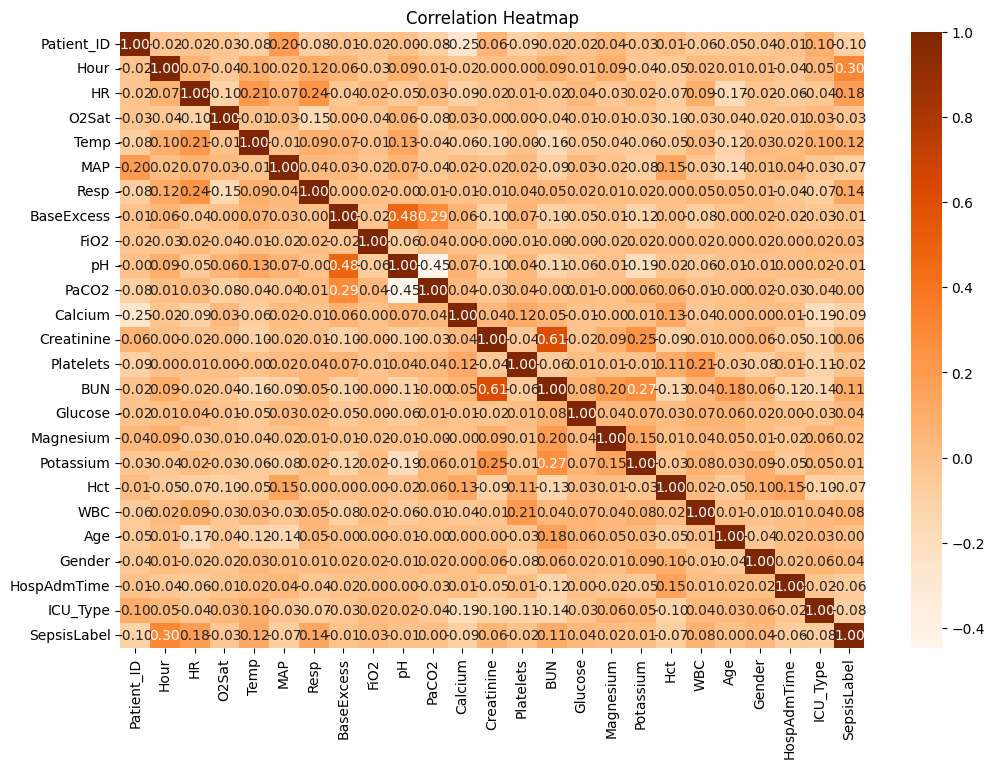

Features with Positive Correlation to SepsisLabel:
['Hour', 'HR', 'Temp', 'Resp', 'FiO2', 'PaCO2', 'Creatinine', 'BUN', 'Glucose', 'Magnesium', 'Potassium', 'WBC', 'Age', 'Gender', 'SepsisLabel']
Features with Negative Correlation to SepsisLabel:
['Patient_ID', 'O2Sat', 'MAP', 'BaseExcess', 'pH', 'Calcium', 'Platelets', 'Hct', 'HospAdmTime', 'ICU_Type']


In [91]:
# Correlation between features
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Define feature matrix X
X = df[['Patient_ID', 'Hour', 'HR', 'O2Sat', 'Temp', 'MAP', 'Resp',
        'BaseExcess', 'FiO2', 'pH', 'PaCO2', 'Calcium', 'Creatinine',
        'Platelets', 'BUN', 'Glucose', 'Magnesium', 'Potassium', 'Hct', 'WBC',
        'Age', 'Gender', 'HospAdmTime', 'ICU_Type']]

# Define target variable y
y = df['SepsisLabel']

# Calculate correlation matrix
correlation_matrix = pd.concat([X, y], axis=1).corr()

# Print correlation matrix
print("Correlation Matrix:")
print(correlation_matrix)

# Plot correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='Oranges', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

# Features with positive correlation
positive_corr_features = correlation_matrix[correlation_matrix['SepsisLabel'] > 0].index.tolist()
print("Features with Positive Correlation to SepsisLabel:")
print(positive_corr_features)

# Features with negative correlation
negative_corr_features = correlation_matrix[correlation_matrix['SepsisLabel'] < 0].index.tolist()
print("Features with Negative Correlation to SepsisLabel:")
print(negative_corr_features)


In [92]:
# Dropping the columns
X = df.drop(columns=['SepsisLabel', 'Patient_ID', 'ICU_Type'])
y = df['SepsisLabel']

In [93]:
# Split the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [94]:
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Assuming you have already defined X and y
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the XGBoost classifier
xgb_classifier = XGBClassifier(random_state=42)

# Fit XGBoost classifier to obtain feature importances
xgb_classifier.fit(X_train, y_train)

# Create a feature selector based on feature importances
feature_selector = SelectFromModel(xgb_classifier, threshold='median')

# Fit the feature selector to obtain selected features
X_train_selected = feature_selector.fit_transform(X_train, y_train)
X_test_selected = feature_selector.transform(X_test)

# Define the parameter grid for XGBoost
param_grid = {
    'learning_rate': [0.01, 0.1, 0.2],
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7]
}

# Initialize GridSearchCV with the XGBoost classifier and parameter grid
grid_search = GridSearchCV(estimator=xgb_classifier, param_grid=param_grid, cv=5, scoring='accuracy')

# Fit GridSearchCV to the training data using selected features
grid_search.fit(X_train_selected, y_train)

# Get the best performing model
best_xgb_model = grid_search.best_estimator_

# Print the best hyperparameters
print("Best Hyperparameters:")
print(grid_search.best_params_)
print()

# Print selected feature names
print("Selected Features:")
selected_features = [feature for feature, mask in zip(X.columns, feature_selector.get_support()) if mask]
for feature in selected_features:
    print(feature)

# Evaluate the best model on the test set using selected features
y_pred_test = best_xgb_model.predict(X_test_selected)

# Calculate evaluation metrics
test_accuracy = accuracy_score(y_test, y_pred_test)
test_precision = precision_score(y_test, y_pred_test)
test_recall = recall_score(y_test, y_pred_test)
test_f1 = f1_score(y_test, y_pred_test)

# Print evaluation metrics for the best model
print("Evaluation Metrics for Best Model:")
print(f"Accuracy: {test_accuracy}")
print(f"Precision: {test_precision}")
print(f"Recall: {test_recall}")
print(f"F1-score: {test_f1}")


Best Hyperparameters:
{'learning_rate': 0.2, 'max_depth': 7, 'n_estimators': 300}

Selected Features:
Hour
HR
Temp
FiO2
pH
PaCO2
Creatinine
Platelets
BUN
WBC
HospAdmTime
Evaluation Metrics for Best Model:
Accuracy: 0.8766536964980545
Precision: 0.8529484332593141
Recall: 0.9068730325288562
F1-score: 0.8790845518118245


In [95]:
# Feature Selection
from sklearn.feature_selection import SelectKBest, f_classif

# Perform feature selection using SelectKBest
k_best_selector = SelectKBest(score_func=f_classif, k=10)
X_train_selected = k_best_selector.fit_transform(X_train, y_train)
X_test_selected = k_best_selector.transform(X_test)

# Get the selected feature indices
selected_indices = k_best_selector.get_support(indices=True)

# Get the feature names from the original dataset
selected_feature_names = X.columns[selected_indices]

# Print selected feature names
print("Selected Feature Names:")
for feature_name in selected_feature_names:
    print(feature_name)


Selected Feature Names:
Hour
HR
Temp
MAP
Resp
Calcium
BUN
Hct
WBC
HospAdmTime


In [96]:
from sklearn.preprocessing import StandardScaler

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_selected)
X_test_scaled = scaler.transform(X_test_selected)


In [97]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Define a smaller parameter grid
param_grid = {
    'C': [1],
    'gamma': ['scale'],
    'kernel': ['rbf']
}

# Initialize SVM classifier
svm_classifier = SVC(random_state=42)

# Initialize GridSearchCV with fewer folds and parallelization
grid_search = GridSearchCV(estimator=svm_classifier, param_grid=param_grid, cv=2, scoring='accuracy', n_jobs=-1)

# Fit GridSearchCV to the training data using scaled features
grid_search.fit(X_train_scaled, y_train)

# Get the best performing model
best_svm_model = grid_search.best_estimator_

# Print the best hyperparameters
print("Best Hyperparameters:")
print(grid_search.best_params_)
print()

# Predict on the test set
y_pred_test = best_svm_model.predict(X_test_scaled)

# Evaluate the model
test_accuracy = accuracy_score(y_test, y_pred_test)
test_precision = precision_score(y_test, y_pred_test)
test_recall = recall_score(y_test, y_pred_test)
test_f1 = f1_score(y_test, y_pred_test)

# Print evaluation metrics for the test set
print("Evaluation Metrics for Test Set:")
print(f"Accuracy: {test_accuracy}")
print(f"Precision: {test_precision}")
print(f"Recall: {test_recall}")
print(f"F1-score: {test_f1}")


Best Hyperparameters:
{'C': 1, 'gamma': 'scale', 'kernel': 'rbf'}

Evaluation Metrics for Test Set:
Accuracy: 0.7269779507133592
Precision: 0.7590288315629742
Recall: 0.6560860440713536
F1-score: 0.703813141972703


In [108]:
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier

# Initialize a base classifier (e.g., Random Forest) with a fixed random state
base_classifier = RandomForestClassifier(random_state=42)

# Initialize RFE with the base classifier
rfe_selector = RFE(estimator=base_classifier, n_features_to_select=10, step=5)

# Fit RFE to your data
rfe_selector.fit(X, y)

# Get the selected features
selected_features = X.columns[rfe_selector.support_]

# Print selected feature names
print("Selected Features:")
for feature in selected_features:
    print(feature)


Selected Features:
Hour
HR
Temp
PaCO2
Creatinine
Platelets
Hct
WBC
Age
HospAdmTime


In [109]:
# Selecting only the selected features
X_train_selected = X_train[['Hour', 'HR', 'Temp', 'Creatinine', 'Platelets', 'BUN', 'PaCO2', 'WBC', 'Age', 'HospAdmTime']]
X_test_selected = X_test[['Hour', 'HR', 'Temp', 'Creatinine', 'Platelets', 'BUN', 'PaCO2', 'WBC', 'Age', 'HospAdmTime']]

# Feature Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_selected)
X_test_scaled = scaler.transform(X_test_selected)

In [110]:
# Feature Importance
from sklearn.ensemble import RandomForestClassifier

# Initialize Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Train Random Forest classifier on selected features from the training set
rf_classifier.fit(X_train_selected, y_train)

# Get feature importances
feature_importances = rf_classifier.feature_importances_

# Create a DataFrame to display feature importances
feature_importance_df = pd.DataFrame({'Feature': selected_features, 'Importance': feature_importances})

# Sort the DataFrame by feature importance (descending order)
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Print the top 10 most important features
print("Top 10 Most Important Features:")
print(feature_importance_df.head(10))


Top 10 Most Important Features:
       Feature  Importance
0         Hour    0.210864
9  HospAdmTime    0.106712
2         Temp    0.101317
8          Age    0.093319
7          WBC    0.086709
1           HR    0.085600
4   Creatinine    0.084169
3        PaCO2    0.079744
5    Platelets    0.077918
6          Hct    0.073648


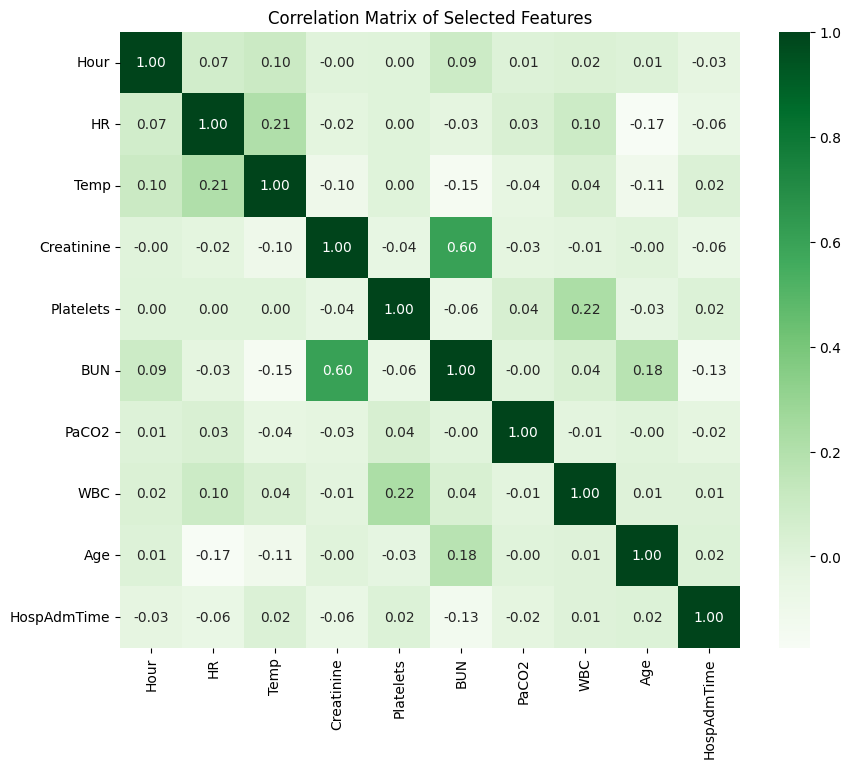

In [112]:
# Correlation Between Selected Features
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the correlation matrix
correlation_matrix = X_train_selected.corr()

# Plot the correlation matrix heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='Greens', fmt=".2f")
plt.title('Correlation Matrix of Selected Features')
plt.show()


In [113]:
# RandomForest Model
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score

# Define the parameter grid for Random Forest with reduced values
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

# Define scoring metrics for GridSearchCV
scoring = {
    'accuracy': make_scorer(accuracy_score),
    'precision': make_scorer(precision_score),
    'recall': make_scorer(recall_score),
    'f1_score': make_scorer(f1_score)
}

# Initialize the Random Forest classifier
rf_classifier = RandomForestClassifier(random_state=42)

# Initialize GridSearchCV with the Random Forest classifier, parameter grid, and scoring metrics
grid_search = GridSearchCV(estimator=rf_classifier, param_grid=param_grid, cv=3, scoring=scoring, refit='accuracy', n_jobs=-1)

# Fit GridSearchCV to the training data
grid_search.fit(X_train_selected, y_train)

# Get the best Random Forest model
best_rf_model = grid_search.best_estimator_

# Print the best hyperparameters
print("Best Hyperparameters:")
print(grid_search.best_params_)
print()

# Evaluate the best model on the test set
y_pred_test = best_rf_model.predict(X_test_selected)

# Calculate evaluation metrics
test_accuracy = accuracy_score(y_test, y_pred_test)
test_precision = precision_score(y_test, y_pred_test)
test_recall = recall_score(y_test, y_pred_test)
test_f1 = f1_score(y_test, y_pred_test)

# Print evaluation metrics for the best model
print("Evaluation Metrics for Best Model:")
print(f"Accuracy: {test_accuracy}")
print(f"Precision: {test_precision}")
print(f"Recall: {test_recall}")
print(f"F1-score: {test_f1}")


Best Hyperparameters:
{'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}

Evaluation Metrics for Best Model:
Accuracy: 0.9072632944228275
Precision: 0.88
Recall: 0.940713536201469
F1-score: 0.9093444909344491


In [114]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from xgboost import XGBClassifier

# Define Decision Tree classifier
dt_classifier = DecisionTreeClassifier(random_state=42)

# Define XGBoost classifier
xgb_classifier = XGBClassifier(random_state=42)

# Create the ensemble model using VotingClassifier
ensemble_model = VotingClassifier(estimators=[('dt', dt_classifier), ('xgb', xgb_classifier)], voting='hard')

# Define the parameter grid for hyperparameter tuning
param_grid = {
    'dt__max_depth': [None, 5],
    'xgb__n_estimators': [50, 100],
    'xgb__learning_rate': [0.01, 0.1]
}

# Initialize GridSearchCV with the ensemble model and parameter grid
grid_search = GridSearchCV(estimator=ensemble_model, param_grid=param_grid, cv=3, scoring='accuracy', 
                           refit='accuracy', return_train_score=True, n_jobs=-1, verbose=2)

# Fit GridSearchCV to the training data
grid_search.fit(X_train_selected, y_train)

# Get the best performing model
best_ensemble_model = grid_search.best_estimator_

# Print the best hyperparameters
print("Best Hyperparameters:")
print(grid_search.best_params_)
print()

# Predict on the test set using the best ensemble model
y_pred_test_ensemble = best_ensemble_model.predict(X_test_selected)

# Calculate evaluation metrics on the test set
test_accuracy_ensemble = accuracy_score(y_test, y_pred_test_ensemble)
test_precision_ensemble = precision_score(y_test, y_pred_test_ensemble)
test_recall_ensemble = recall_score(y_test, y_pred_test_ensemble)
test_f1_ensemble = f1_score(y_test, y_pred_test_ensemble)

# Print evaluation metrics
print("Ensemble Test Accuracy:", test_accuracy_ensemble)
print("Ensemble Test Precision:", test_precision_ensemble)
print("Ensemble Test Recall:", test_recall_ensemble)
print("Ensemble Test F1-score:", test_f1_ensemble)


Fitting 3 folds for each of 8 candidates, totalling 24 fits
Best Hyperparameters:
{'dt__max_depth': None, 'xgb__learning_rate': 0.1, 'xgb__n_estimators': 100}

Ensemble Test Accuracy: 0.7900129701686122
Ensemble Test Precision: 0.8700641241984475
Ensemble Test Recall: 0.6762854144805877
Ensemble Test F1-score: 0.7610332103321034


Ensemble Classification Report:
              precision    recall  f1-score   support

           0       0.74      0.90      0.81      3898
           1       0.87      0.68      0.76      3812

    accuracy                           0.79      7710
   macro avg       0.81      0.79      0.79      7710
weighted avg       0.80      0.79      0.79      7710



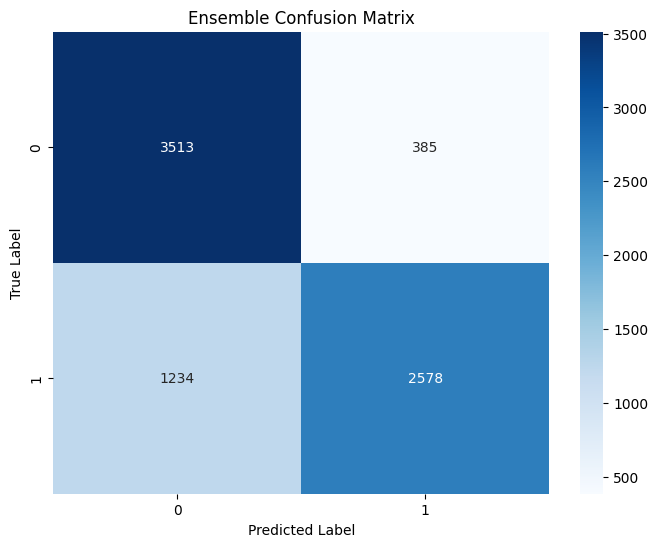

Classification Report for Random Forest:
              precision    recall  f1-score   support

           0       0.93      0.87      0.90      3898
           1       0.88      0.93      0.90      3812

    accuracy                           0.90      7710
   macro avg       0.90      0.90      0.90      7710
weighted avg       0.90      0.90      0.90      7710



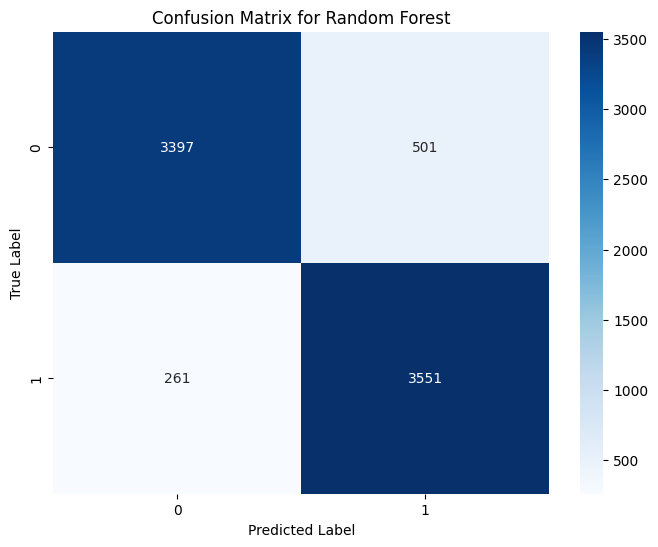

Classification Report for XGB:
              precision    recall  f1-score   support

           0       0.85      0.84      0.85      3898
           1       0.84      0.85      0.84      3812

    accuracy                           0.85      7710
   macro avg       0.85      0.85      0.85      7710
weighted avg       0.85      0.85      0.85      7710



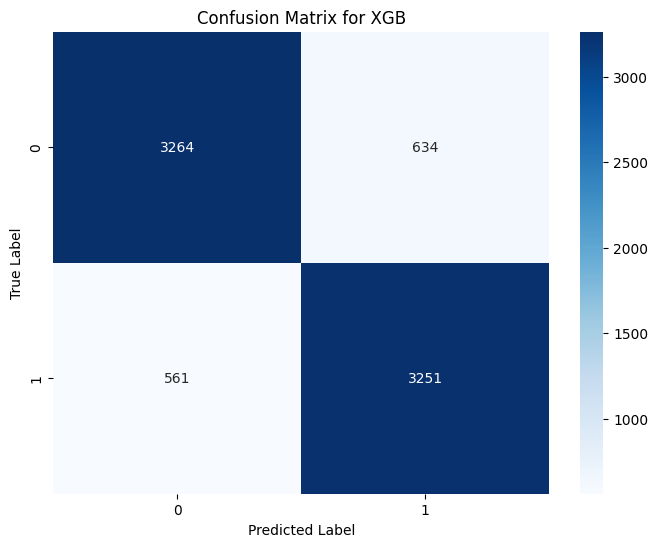

Classification Report for SVM:
              precision    recall  f1-score   support

           0       0.66      0.77      0.71      3898
           1       0.72      0.59      0.65      3812

    accuracy                           0.68      7710
   macro avg       0.69      0.68      0.68      7710
weighted avg       0.69      0.68      0.68      7710



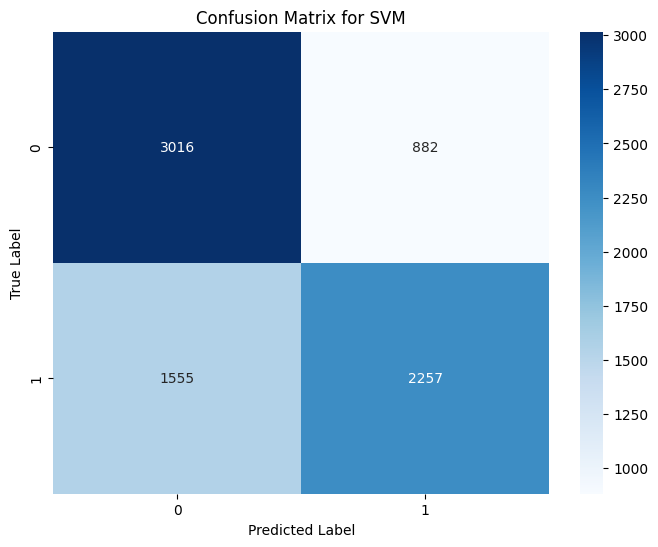

In [115]:
# classification report and confusion matrix
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier, VotingClassifier

# Initialize classifiers
classifiers = {
    'Random Forest': RandomForestClassifier(),
    'XGB':  XGBClassifier(),
    'SVM': SVC(),
}

# Generate classification report for the ensemble model
print("Ensemble Classification Report:")
print(classification_report(y_test, y_pred_test_ensemble))

# Generate confusion matrix for the ensemble model
cm_ensemble = confusion_matrix(y_test, y_pred_test_ensemble)

# Plot confusion matrix for the ensemble model
plt.figure(figsize=(8, 6))
sns.heatmap(cm_ensemble, annot=True, cmap='Blues', fmt='g')
plt.title('Ensemble Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


# Train and evaluate each classifier
for name, classifier in classifiers.items():
    # Fit the classifier to the training data
    classifier.fit(X_train, y_train)
    
    # Predict on the test data
    y_pred = classifier.predict(X_test)
    
    # Generate classification report
    print(f"Classification Report for {name}:")
    print(classification_report(y_test, y_pred))
    
    # Generate confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    
    # Plot confusion matrix
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
    plt.title(f'Confusion Matrix for {name}')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.show()


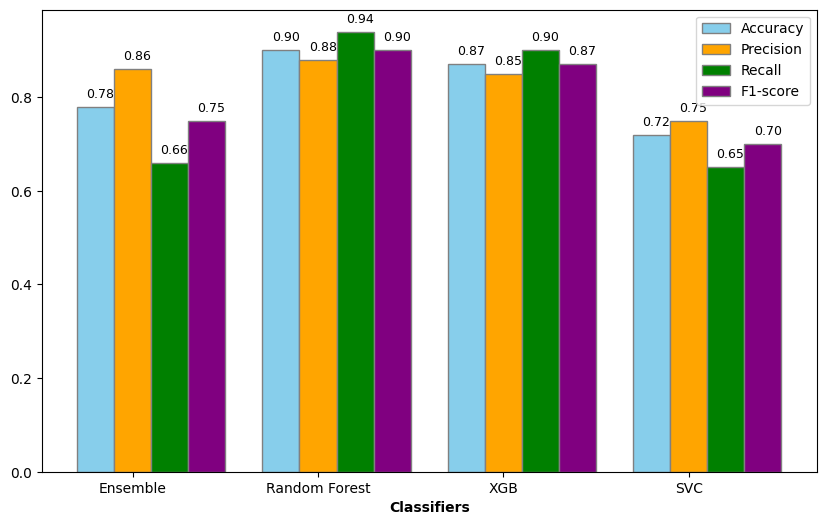

In [116]:
# Comparing Models
import numpy as np
import matplotlib.pyplot as plt

# Classifier names
classifiers = ['Ensemble', 'Random Forest','XGB','SVC']

# Accuracy scores
accuracy_scores = [0.78, 0.90,0.87,0.72]

# Precision scores
precision_scores = [0.86, 0.88,0.85,0.75]

# Recall scores
recall_scores = [0.66, 0.94,0.90,0.65]

# F1-score scores
f1_scores = [0.75, 0.90,0.87,0.70]

# Define the width of each bar
bar_width = 0.2

# Set the positions of the bars on the x-axis
r1 = np.arange(len(classifiers))
r2 = [x + bar_width for x in r1]
r3 = [x + bar_width for x in r2]
r4 = [x + bar_width for x in r3]

# Plotting
plt.figure(figsize=(10, 6))
plt.bar(r1, accuracy_scores, color='skyblue', width=bar_width, edgecolor='grey', label='Accuracy')
plt.bar(r2, precision_scores, color='orange', width=bar_width, edgecolor='grey', label='Precision')
plt.bar(r3, recall_scores, color='green', width=bar_width, edgecolor='grey', label='Recall')
plt.bar(r4, f1_scores, color='purple', width=bar_width, edgecolor='grey', label='F1-score')

# Add xticks on the middle of the group bars
plt.xlabel('Classifiers', fontweight='bold')
plt.xticks([r + bar_width for r in range(len(classifiers))], classifiers)

# Add labels to each bar
for i in range(len(classifiers)):
    plt.text(r1[i] - 0.05, accuracy_scores[i] + 0.02, f'{accuracy_scores[i]:.2f}', fontsize=9)
    plt.text(r2[i] - 0.05, precision_scores[i] + 0.02, f'{precision_scores[i]:.2f}', fontsize=9)
    plt.text(r3[i] - 0.05, recall_scores[i] + 0.02, f'{recall_scores[i]:.2f}', fontsize=9)
    plt.text(r4[i] - 0.05, f1_scores[i] + 0.02, f'{f1_scores[i]:.2f}', fontsize=9)

# Create legend & Show graphic
plt.legend()
plt.show()
